<a href="https://colab.research.google.com/github/gustavorenner/RedesComplexas/blob/main/Trabalho_final_redes_complexas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Este código tem como objetivo a análise de redes complexas, focando em redes sociais. Ele utiliza a biblioteca NetworkX em Python para realizar a análise.

O código realiza as seguintes etapas principais:

1. Carrega dados de três redes sociais diferentes a partir de arquivos CSV. Esses dados representam as conexões entre indivíduos dentro de cada rede.

2. Constrói grafos representando cada rede social, onde os nós são os indivíduos e as arestas são as conexões entre eles.

3. Calcula diversas métricas de centralidade para cada grafo, como centralidade de grau, de intermediação e de autovetor. Essas métricas ajudam a identificar os indivíduos mais importantes ou influentes dentro da rede.

4. Gera gráficos da distribuição de graus e da distribuição de caminhos mínimos para cada rede. Esses gráficos fornecem uma visão geral da estrutura e das propriedades da rede, como a conectividade e o comprimento do caminho entre os indivíduos.

Em resumo, o código busca analisar a estrutura e as propriedades de diferentes redes sociais através do cálculo de métricas de centralidade e da visualização de distribuições. O objetivo é compreender as relações entre os indivíduos dentro de cada rede e identificar os nós mais importantes.


In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Defina a variável 'nomes_colunas'
nomes_colunas = ["Origem", "Destino"]

In [ ]:
# Função para calcular métricas de centralidade
def calcular_centralidade_basica(G):
    centralidades = {
        'Degree Centrality': nx.degree_centrality(G),
        'Closeness Centrality': nx.closeness_centrality(G),
        'Betweenness Centrality': nx.betweenness_centrality(G),
        'Eigenvector Centrality': nx.eigenvector_centrality(G.to_undirected()),
        'Pagerank': nx.pagerank(G),
        'Hubs': nx.hits(G)[0],
        'Authorities': nx.hits(G)[1]
    }
    return centralidades

In [ ]:
# Função para calcular as 10 métricas distintas adicionais
def calcular_metricas_adicionais(G):
    centralidades = calcular_centralidade_basica(G)
    centralidades['Clustering Coefficient'] = nx.clustering(G)
    centralidades['Assortativity'] = nx.degree_assortativity_coefficient(G)
    centralidades['Transitivity'] = nx.transitivity(G)
    centralidades['Weighted Betweenness'] = nx.betweenness_centrality(G, weight='weight')
    centralidades['Weighted Eigenvector'] = nx.eigenvector_centrality(G, weight='weight')
    return centralidades

In [ ]:
def calcular_e_mostrar_resultados(G, nome_rede):
    num_metricas_basica = 7
    centralidades_basica = calcular_centralidade_basica(G)
    dados_basica = []

    for pessoa in G.nodes():
        linha = [pessoa]
        metricas = [centralidades_basica[metrica][pessoa] for metrica in centralidades_basica]
        soma_ponderada = np.sum([k / num_metricas_basica for k in metricas])
        linha.append(soma_ponderada)
        linha.extend(metricas)
        dados_basica.append(linha)

    df_resultados_basica = pd.DataFrame(
        dados_basica, columns=['Personagem', 'Geral'] + list(centralidades_basica.keys())
    ).sort_values(['Geral'], ascending=False)

    print(f"Resultados para as 7 primeiras métricas em {nome_rede}:")
    print(df_resultados_basica.head(5))  # Mostra os 5 principais nós
    print("\n")


    # Calcular e mostrar as 10 métricas distintas adicionais
    centralidades_adicionais = calcular_metricas_adicionais(G)
    dados_adicionais = []

    for personagem in G.nodes():
        linha = [personagem]
        metricas = [centralidades_adicionais[metrica][personagem] for metrica in centralidades_adicionais]
        dados_adicionais.append(metricas)

    df_resultados_adicionais = pd.DataFrame(
        dados_adicionais, columns=list(centralidades_adicionais.keys())
    )

    print(f"Resultados para as 10 métricas adicionais em {nome_rede}:")
    print(df_resultados_adicionais.head(5))  # Mostra os 5 principais nós
    print("\n")

In [ ]:
# Plotar distribuição de graus e distribuição de caminhos mínimos
def plot_degree_distribution(G, nome_rede):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, bins=30, alpha=0.7)
    plt.title(f'Distribuição de Graus em {nome_rede}')
    plt.xlabel('Grau')
    plt.ylabel('Número de Nós')
    plt.show()

def plot_shortest_path_distribution(G, nome_rede):
    shortest_paths = []
    for source in G.nodes():
        for target in G.nodes():
            if source != target:
                try:
                    shortest_path = nx.shortest_path_length(G, source=source, target=target)
                    shortest_paths.append(shortest_path)
                except nx.NetworkXNoPath:
                    pass
    plt.hist(shortest_paths, bins=20, alpha=0.7)
    plt.title(f'Distribuição de Caminhos Mínimos em {nome_rede}')
    plt.xlabel('Comprimento do Caminho Mínimo')
    plt.ylabel('Número de Pares de Nós')
    plt.show()

In [ ]:
# Carregar os dados das redes
df1 = pd.read_csv("https://raw.githubusercontent.com/gustavorenner/Redes_complexas/main/socfb-Caltech36.csv", delimiter="\s+", header=None, skiprows=2, names=nomes_colunas)
df2 = pd.read_csv("https://raw.githubusercontent.com/gustavorenner/Redes_complexas/main/socfb-Haverford76.csv", delimiter="\s+", header=None, skiprows=2, names=nomes_colunas)
df3 = pd.read_csv("https://raw.githubusercontent.com/gustavorenner/Redes_complexas/main/socfb-Reed98.csv", delimiter="\s+", header=None, skiprows=2, names=nomes_colunas)

In [ ]:
# Criar os grafos
G1 = nx.Graph()
for _, row in df1.iterrows():
    G1.add_edge(row['Origem'], row['Destino'])

G2 = nx.Graph()
for _, row in df2.iterrows():
    G2.add_edge(row['Origem'], row['Destino'])

G3 = nx.Graph()
for _, row in df3.iterrows():
    G3.add_edge(row['Origem'], row['Destino'])

In [ ]:
# Calcular e mostrar os resultados para cada rede
calcular_e_mostrar_resultados(G1, "G1")
calcular_e_mostrar_resultados(G2, "G2")
calcular_e_mostrar_resultados(G3, "G3")

Resultados para as 7 primeiras métricas em G1:
     Personagem     Geral  Degree Centrality  Closeness Centrality  \
118         709  0.155815           0.322917              0.569535   
8            90  0.139108           0.264323              0.548011   
34          223  0.135753           0.252604              0.539002   
108         664  0.130041           0.239583              0.530284   
42          257  0.127249           0.223958              0.527686   

     Betweenness Centrality  Eigenvector Centrality  Pagerank      Hubs  \
118                0.047079                0.131991  0.006683  0.006252   
8                  0.028809                0.116052  0.005564  0.005497   
34                 0.042579                0.100884  0.005643  0.004778   
108                0.018295                0.107220  0.004750  0.005079   
42                 0.012622                0.111609  0.004296  0.005287   

     Authorities  
118     0.006252  
8       0.005497  
34      0.004778  
108  

IndexError: ignored

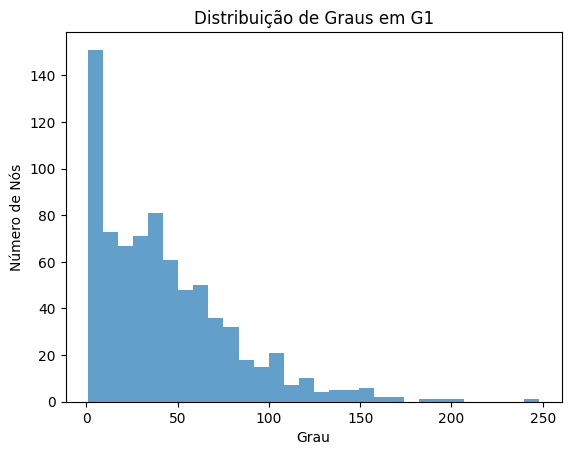

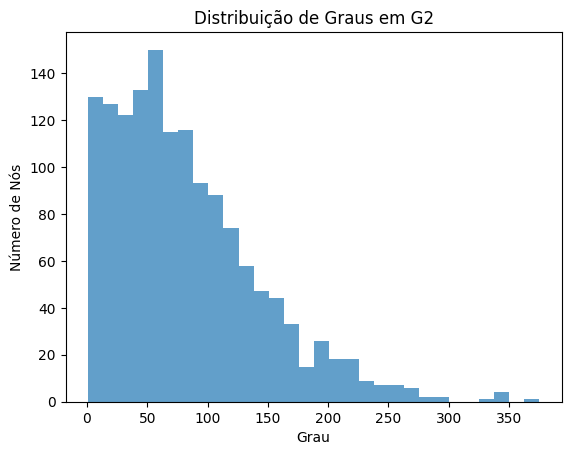

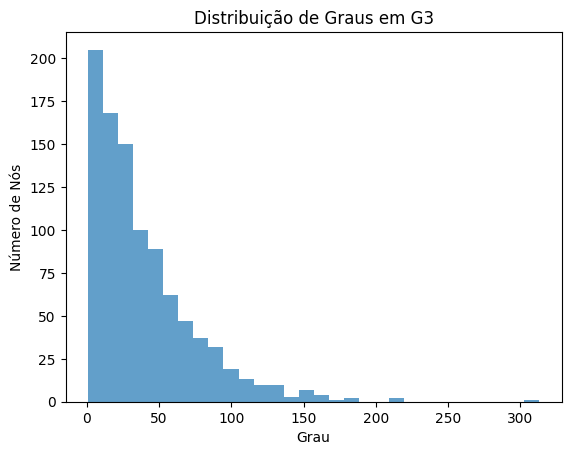

In [ ]:
plot_degree_distribution(G1, "G1")
plot_degree_distribution(G2, "G2")
plot_degree_distribution(G3, "G3")

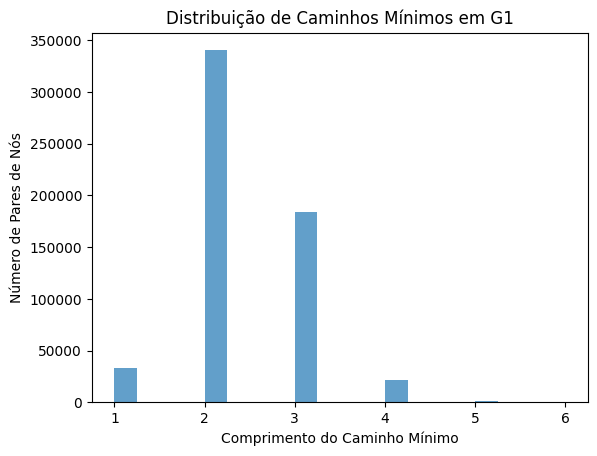

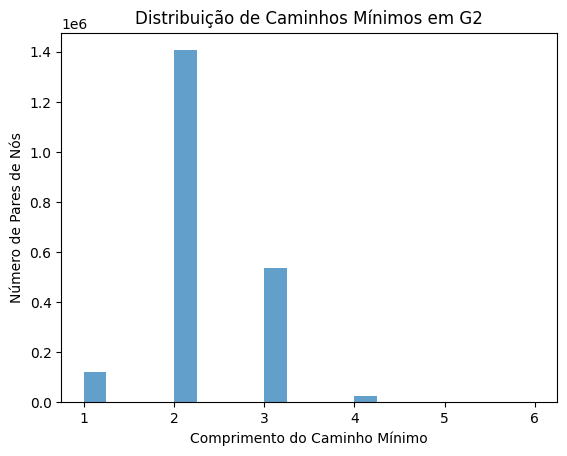

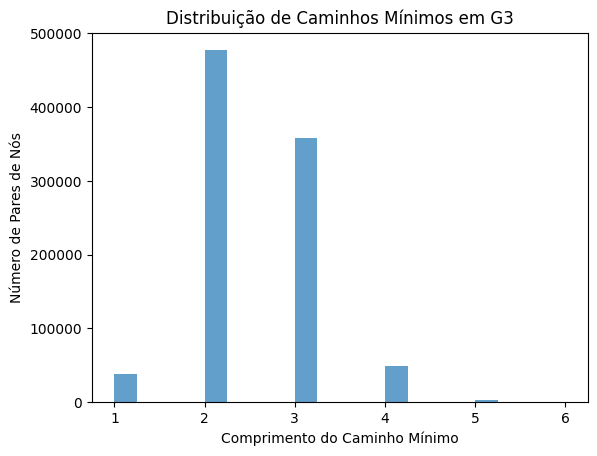

In [ ]:
plot_shortest_path_distribution(G1, "G1")
plot_shortest_path_distribution(G2, "G2")
plot_shortest_path_distribution(G3, "G3")

In [ ]:
# Verifique se o grafo é conectado antes de calcular o diâmetro
    if nx.is_connected(G):
        diameter = nx.diameter(G)
        print(f"Diâmetro em {nome_rede}: {diameter}")
    else:
        print(f"O grafo em {nome_rede} não é conectado.")

    # Calcular e mostrar as 10 métricas distintas adicionais
    centralidades_adicionais = calcular_metricas_adicionais(G)
    dados_adicionais = []

    for pessoa in G.nodes():
        linha = [pessoa]
        metricas = [centralidades_adicionais[metrica] for metrica in centralidades_adicionais]
        dados_adicionais.append(metricas)

    df_resultados_adicionais = pd.DataFrame(
        dados_adicionais, columns=list(centralidades_adicionais.keys())
    )

    print(f"Resultados para as 10 métricas adicionais em {nome_rede}:")
    print(df_resultados_adicionais.head(5))  # Mostra os 5 principais nós
    print("\n")